# <center>TensorFlow tutorial</center>

# 1. Import bibliotek:

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd
import machine_learning_pawel as mlp
import time

# 2. Generowanie zbioru treningowego:

Do wygenerowania danych używam funkcji z mojego modułu machine_learning_pawel. Funkcja,  losuje współrzędne punktów (x,y) , a następnie sprawdza, czy współrzędna y dla danego punktu jest mniejsza czy większa od pewnej przyjętej funkcji. W jednym przypadku dany punkt otrzymuje etykietkę 0 a w drugim 1. W ten sposób punkty są przydzielane do jednej z dwóch klas.

Dane zwracane przez funkcję mlp.generuj_punkty(liczba_probek) mają wymiary: liczba_probek x 3 . Oznacza to, że mamy tyle wierszy ile próbek, a dla każdej próbki trzy wartości. Są to kolejno współrzędna x, współrzędna y oraz etykietka informująca do której klasy należy wygenerowany punkt.


In [2]:
start = time.time()

liczba_probek = 20000
dane = mlp.generuj_punkty(liczba_probek,plot=True)
stop = time.time()
print("generacja danych zakonczona: ",stop-start)

generacja danych zakonczona:  0.09099984169006348


## 3. Wyświetlenie wygenerowanych danych

In [3]:
plt.title('Rozkład punktów należących do klas 0 i 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## 4. Przekształcenie danych do formatu zrozumiałego dla klasyfikatora:

Po wygerowaniu danych trzeba je przekształcić do formatu zrozumiałego dla klasyfikatora (naszej sieci) z biblioteki TensorFlow. Klasyfikator jako dane wejściowe przyjmuje słownik (dict) z opisanymi ceachami (features). 

In [4]:
wejscia = {'x1':dane[:,0],'x2':dane[:,1]}

wyjscia = dane[:,-1]

## 5. Zdefiniowanie struktury feature_columns - czyli słownika z cechami, na podstawie których sieć ma się nauczyć.

Mamy dwie cechy, które przyjmują wartości numeryczne, zatem ustalamy następującą strukturę feature_columns:

In [5]:
my_feature_columns = [tf.feature_column.numeric_column("x1"),tf.feature_column.numeric_column("x2")]

Uwaga, tutaj tylko definiujemy strukturę, nie przypisujemy danych.

Etykietki dla kolumn podane przy słowniku <i>wejscia</i> muszą się zgadzać z tymi które podajemy w my_feature_columns

## 6. Utworzenie klasyfikatora - DNNClassifier (Deep Neural Network Classifier)

W uczeniu maszynowym najczęściej można spotkać dwa podstawowe zadania - klasyfikację i regresję. Klasyfikacja polega na dopasowywaniu danych do jednej z dostępnych klas, natomiast regresja na obliczeniu ciągłej wartości na podstawie otrzymanych danych. 

Chcemy stworzyć sieć, która przyporządkuje losowo wygenerowane punkty do jednej z dwóch klas, na podstawie współrzędnych X i Y. Jest to zadanie klasyfikacji, zatem potrzebujemy klasyfikatora. Gdybyśmy chcieli przewidywać wartości ciągłe (np. cenę mieszkania na podstawie kilku cech), potrzebny byłyby regresor. 

Biblioteka Tensorflow oferuje wiele różnych sposobów stworzenia klasyfikatora. Na szczęście nie trzeba pisać wszystkiego od podstaw, można skorzystać z wbudowanych klas. W tym przypadku wybrałem klasyfikator, dla którego można określić liczbę warstw sieci i inne parametry. Normalnie może służyć do o wiele bardziej skomplikowanych zadań. Gdyby dane można było rozdzielne liniowo, można by było użyć klasyfikatora LinearClassifier.


* feature_columns - tutaj trzeba podać strukturę danych , w naszym przypadku to my_feature_columns
* hidden_units - liczba neuronów w kolejnych warstwach sieci
* model_dir - folder w którym zapisywany jest model sieci i wszystkie wyniki
* activation_fn - funkcja aktywacji neuronu używana w naszej sieci (domyślnie relu)
* n_classes - liczba klas, na które mają zostać podzielone dane
* optimizer - rodzaj używanego algorytmu optymalizacyjnego



In [6]:
classifier = tf.estimator.DNNClassifier(feature_columns=my_feature_columns, hidden_units=[10,5],
                    n_classes=2,optimizer='Adam',model_dir='/tmp/10_5_500_neuronow',activation_fn=tf.nn.sigmoid)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_save_checkpoints_secs': 600, '_save_checkpoints_steps': None, '_tf_random_seed': 1, '_save_summary_steps': 100, '_keep_checkpoint_max': 5, '_model_dir': '/tmp/10_5_500_neuronow', '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_session_config': None}


## 7. Trening klasyfikatora

In [7]:
for i in range(0,1):
    train_input_fn = tf.estimator.inputs.numpy_input_fn(x=wejscia,y=wyjscia,shuffle=True,batch_size=500)
    
    # Train model.
    classifier.train(input_fn=train_input_fn)

    # Define the test inputs

    dane_test = mlp.generuj_punkty(2000,plot=False)

    wejscia2 = {'x1':dane_test[:,0],'x2':dane_test[:,1]}
    wyjscia2 = dane_test[:,2]
    print(wejscia2)

    #plt.show()

    test_input_fn = tf.estimator.inputs.numpy_input_fn(x=wejscia2,y=wyjscia2,shuffle=True)

    # Evaluate accuracy.
    accuracy_score = classifier.evaluate(input_fn=test_input_fn)["accuracy"]
    print('\nTest set accuracy: ',accuracy_score)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Restoring parameters from /tmp/10_5_500_neuronow\model.ckpt-16561
INFO:tensorflow:Saving checkpoints for 16562 into /tmp/10_5_500_neuronow\model.ckpt.
INFO:tensorflow:step = 16562, loss = 3.83944
INFO:tensorflow:Saving checkpoints for 16601 into /tmp/10_5_500_neuronow\model.ckpt.
INFO:tensorflow:Loss for final step: 2.43992.
{'x2': array([-1.13960039,  4.12407017,  0.16914223, ..., -2.77665764,
        2.82546916,  0.16349748]), 'x1': array([-2.10390186,  1.45115061, -3.70844229, ..., -2.67398207,
       -0.19239893, -1.92280902])}
INFO:tensorflow:Starting evaluation at 2018-01-28-14:37:58
INFO:tensorflow:Restoring parameters from /tmp/10_5_500_neuronow\model.ckpt-16601
INFO:tensorflow:Finished evaluation at 2018-01-28-14:37:59
INFO:tensorflow:Saving dict for global step 16601: accuracy = 0.9965, accuracy_baseline = 0.5745, auc = 0.999986, auc_precision_recall = 0.999989, average_loss = 0.00591431, global_step = 16601, label/m

## 8. Sprawdzenie działania sieci na nowych danych:

In [8]:
dane_test = mlp.generuj_punkty(2000,plot=True)

wejscia2 = {'x1':dane_test[:,0],'x2':dane_test[:,1]}


#plt.show()

test_input_fn = tf.estimator.inputs.numpy_input_fn(x=wejscia2,shuffle=False)


predictions = classifier.predict(input_fn = test_input_fn)

INFO:tensorflow:Restoring parameters from /tmp/10_5_500_neuronow\model.ckpt-16601


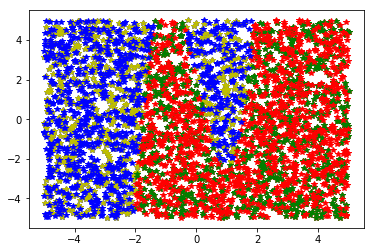

In [9]:
index = 0

for i in predictions:
    if i['class_ids']==0:
        kolor = 'y*'
    else:
        kolor = 'g*'
    
    plt.plot(wejscia2['x1'][index],wejscia2['x2'][index],kolor)
    index=index+1
  

mlp.generuj_punkty(2000,plot=True)

    
plt.show()

## 9. TensorBoard

TensorBoard umożliwa podgląd statystyk dotyczących modelu. Na podstawie przebiegu wykresów takich jak accuracy_score czy average_loss można określić i porównać jak radzą sobie różne modele przy różnych parametrach, a tym samym wybrać jak najlepszą architekturę sieci i wartości parametrów.

In [ ]:
tensorboard --logdir C:\tmp

## 10. Wnioski:

1. batch_size:
    * jak za mały, to accuracy i average_loss latają we wszystkie strony i sieć słabo się uczy,
    jak za duży, to sieć uczy się za wolno, ale accuracy i average_loss tak nie latają
2. activation_fn:
    * tanh - zwykle pokazuje jakieś dziadostwo
    * sigmoid - do moich zastosowań najlepiej
    * relu - wg internetu lepsze niż sigmoid do trudniejszych zadań
3. tensorboard:
   * każdy model należy zapisywać w osobnym folderze i odpowiednio go nazywać, żeby potem można było wyświetlać modele i porównywać
   * dane treningowe wygenerować raz i dla nich zmieniać strukturę modelu 
4. optimizer:
    * adam - sprawdzał się lepiej niż domyślny
    * adagrad
4. ogólne:
    * ważniejszy jest wysoki accuracy_score podczas testu niż jak najbliższe zera average_loss. Chcemy by model nauczył się uogólniać, a nie dopasowywać do danych treningowych
